# Activation maps of the deep decoder

Here, we visualize the activation maps of the deep decoder (Figure 6 in the paper).

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
#%matplotlib notebook

import os

import warnings
warnings.filterwarnings('ignore')

from include import *
from PIL import Image
import PIL

import numpy as np
import torch
import torch.optim
from torch.autograd import Variable

GPU = True
if GPU == True:
    torch.backends.cudnn.enabled = True
    torch.backends.cudnn.benchmark = True
    dtype = torch.cuda.FloatTensor
    os.environ['CUDA_VISIBLE_DEVICES'] = '3'
    print("num GPUs",torch.cuda.device_count())
else:
    dtype = torch.FloatTensor


num GPUs 1


## Load image

In [2]:
path = './test_data/'
img_name = "phantom256"
img_path = path + img_name + ".png"
img_pil = Image.open(img_path)
img_np = pil_to_np(img_pil)
img_np = img_np / np.max(img_np)
img_var = np_to_var(img_np).type(dtype)

## Define network

In [3]:
num_channels = [64]*4
output_depth = img_np.shape[0] # number of output channels
net = decodernw(output_depth,num_channels_up=num_channels).type(dtype)
print("number of parameters: ", num_param(net))
print(net)

number of parameters:  21184
Sequential(
  (1): Sequential(
    (0): ReflectionPad2d((0, 0, 0, 0))
    (1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  )
  (2): ReLU()
  (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): Upsample(scale_factor=2, mode=bilinear)
  (5): Sequential(
    (0): ReflectionPad2d((0, 0, 0, 0))
    (1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  )
  (6): ReLU()
  (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): Upsample(scale_factor=2, mode=bilinear)
  (9): Sequential(
    (0): ReflectionPad2d((0, 0, 0, 0))
    (1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  )
  (10): ReLU()
  (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): Upsample(scale_factor=2, mode=bilinear)
  (13): Sequential(
    (0): ReflectionPad2d((0, 0, 0, 0))
    (1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1,

## Fit image

In [4]:
rnd = 500
numit = 10000
rn = 0.01

mse_n, mse_t, ni, net = fit( num_channels=num_channels,
                        reg_noise_std=rn,
                        reg_noise_decayevery = rnd,
                        num_iter=numit,
                        LR=0.0025,
                        img_noisy_var=img_var,
                        net=net,
                        img_clean_var=img_var,
                        )

shape:  [1, 64, 16, 16]
optimize with adam 0.0025


Deep-Decoder representation of the image, SNR: 47.45384974553173


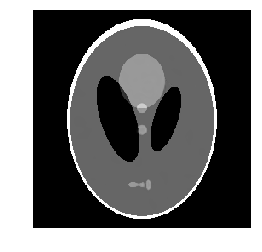

In [5]:
def myimgshow(plt,img):
    plt.gray()
    plt.imshow(np.clip(img[0],0,1),interpolation='nearest')

out_img_np = net( ni.type(dtype) ).data.cpu().numpy()[0]
maxv = np.max(img_np)
print("Deep-Decoder representation of the image, SNR: " + str(psnr(img_np,out_img_np,maxv)))
myimgshow(plt,out_img_np)
plt.axis('off')
plt.savefig('exp_vis_sub'+img_name+'_final.png')
plt.show()

## Visualize activation maps

0 last func. applied: Sigmoid()


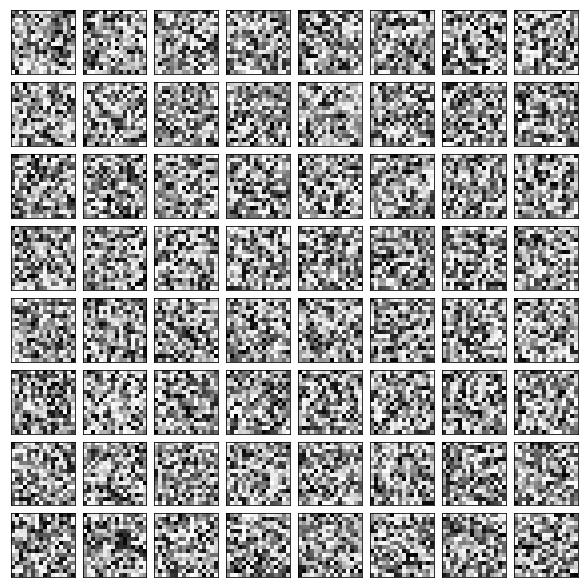

2 last func. applied: ReLU()


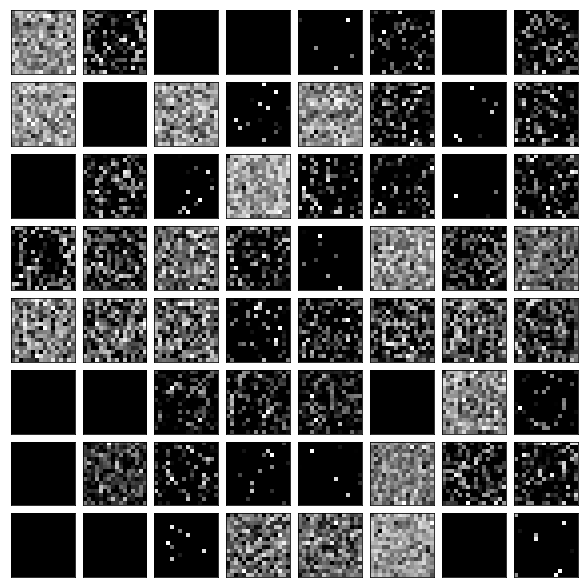

6 last func. applied: ReLU()


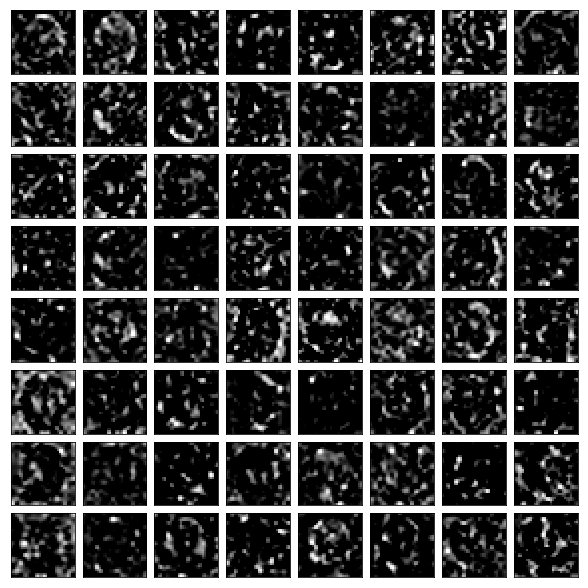

10 last func. applied: ReLU()


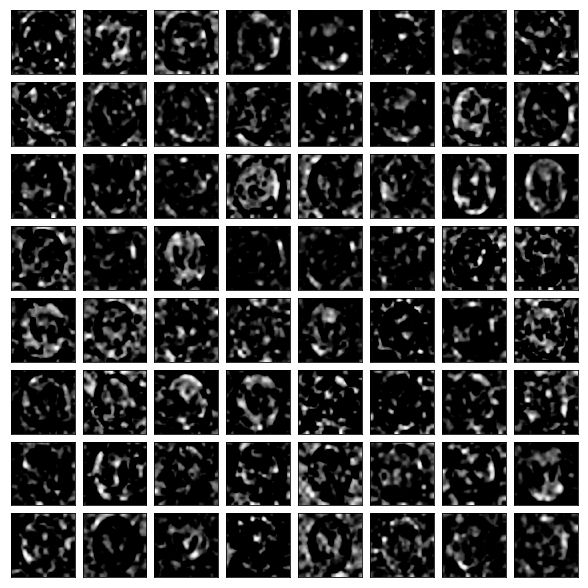

14 last func. applied: ReLU()


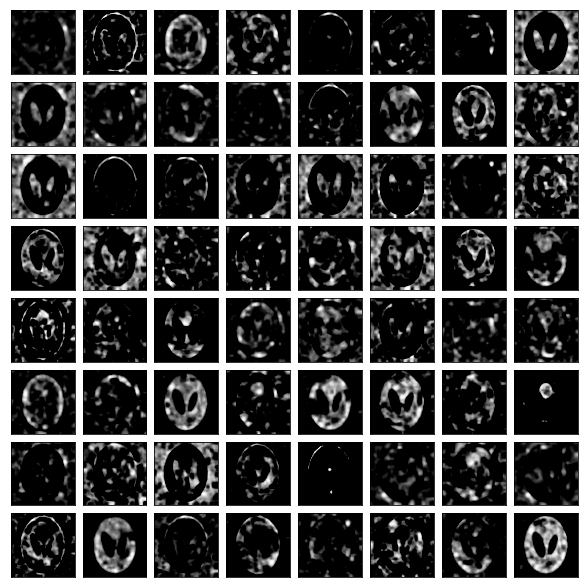

18 last func. applied: ReLU()


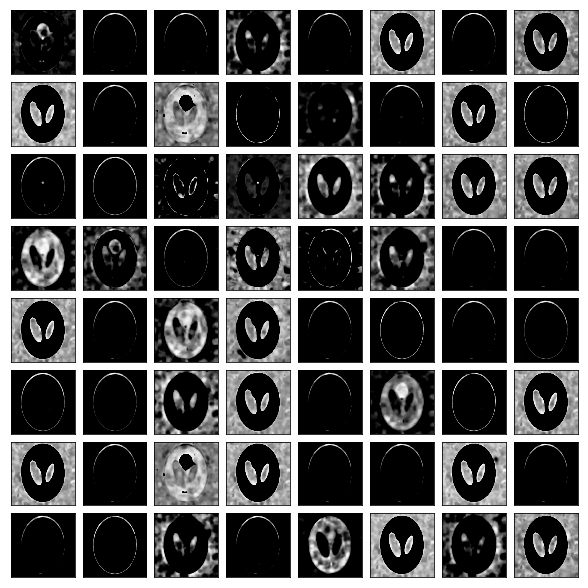

20 last func. applied: Sequential(
  (0): ReflectionPad2d((0, 0, 0, 0))
  (1): Conv2d(64, 1, kernel_size=(1, 1), stride=(1, 1), bias=False)
)


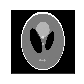

In [6]:
def apply_until(net_input,net,n = 100):
    # applies function by funtion of a network
    for i,fun in enumerate(net):
        if i>=n:
            break
        if i==0:
            out = fun(net_input.type(dtype))
        else:
            out = fun(out)
    print(i, "last func. applied:", net[i-1])
    if n == 0:
        return net_input
    else:
        return out

def plot_tensor(out,nrows=8):
    imgs = [img for img in out.data.cpu().numpy()[0]]
    fig = plot_image_grid(imgs,nrows=nrows)
    plt.show()

before_up = [1,3,7,11,15,19,23]

for n in before_up:
        out = apply_until(ni,net,n-1)
        plot_tensor(out)


In [7]:
## save images for paper
before_up = [1,3,7,11,15,19,23]
allimgs = []
nrows = 8
for i,n in enumerate(before_up):
        out = apply_until(ni,net,n-1)
        imgs = [img for img in out.data.cpu().numpy()[0]]
        imgs = imgs[:nrows]
        fig = plot_image_grid(imgs,nrows = 1 )
        plt.savefig('exp_vis_sub'+img_name+'_'+str(i)+'.png')
        plt.close()

0 last func. applied: Sigmoid()
2 last func. applied: ReLU()
6 last func. applied: ReLU()
10 last func. applied: ReLU()
14 last func. applied: ReLU()
18 last func. applied: ReLU()
20 last func. applied: Sequential(
  (0): ReflectionPad2d((0, 0, 0, 0))
  (1): Conv2d(64, 1, kernel_size=(1, 1), stride=(1, 1), bias=False)
)
